## RNN for Like Count Prediction

### Import Modules

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load Data

In [62]:
train = pd.read_csv("ML Intern Homework/intern_homework_train_dataset.csv")

train["like_count_1h"] = np.log1p(train["like_count_1h"])
train["like_count_2h"] = np.log1p(train["like_count_2h"])
train["like_count_3h"] = np.log1p(train["like_count_3h"])
train["like_count_4h"] = np.log1p(train["like_count_4h"])
train["like_count_5h"] = np.log1p(train["like_count_5h"])
train["like_count_6h"] = np.log1p(train["like_count_6h"])
train["like_count_24h"] = np.log1p(train["like_count_24h"])

X_original = train[
    [
        "like_count_1h",
        "like_count_2h",
        "like_count_3h",
        "like_count_4h",
        "like_count_5h",
        "like_count_6h",
    ]
].to_numpy()

train.drop(
    train[train["like_count_24h"] - train["like_count_6h"] > 3].index, inplace=True
)

X = train[
    [
        "like_count_1h",
        "like_count_2h",
        "like_count_3h",
        "like_count_4h",
        "like_count_5h",
        "like_count_6h",
    ]
].to_numpy()
y = train[["like_count_24h"]].to_numpy()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Build a Simple RNN Model with Keras

In [63]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(6, 1), return_sequences=True))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mse"])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 6, 32)             1088      
                                                                 
 dense_14 (Dense)            (None, 6, 1)              33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### Training Section

In [ ]:
history = model.fit(
    X_train.reshape(-1, 6, 1),
    y_train,
    epochs=60,
    batch_size=32,
    validation_data=(X_valid.reshape(-1, 6, 1), y_valid),
)

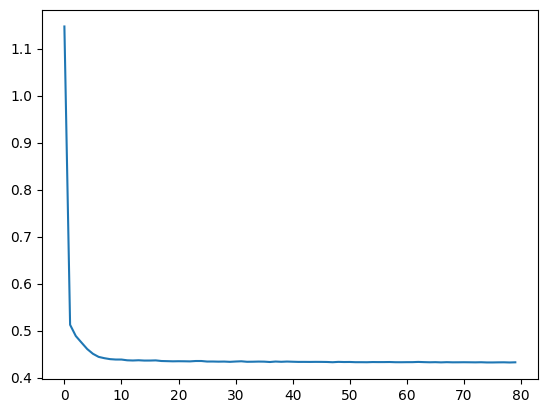

In [ ]:
plt.plot(history.history["loss"], label="train")
plt.show()

### Generate the hidden layer output for Regression

In [ ]:
valid = pd.read_csv("ML Intern Homework/intern_homework_public_test_dataset.csv")
test = pd.read_csv("ML Intern Homework/intern_homework_private_test_dataset.csv")

valid["like_count_1h"] = np.log1p(valid["like_count_1h"])
valid["like_count_2h"] = np.log1p(valid["like_count_2h"])
valid["like_count_3h"] = np.log1p(valid["like_count_3h"])
valid["like_count_4h"] = np.log1p(valid["like_count_4h"])
valid["like_count_5h"] = np.log1p(valid["like_count_5h"])
valid["like_count_6h"] = np.log1p(valid["like_count_6h"])

test["like_count_1h"] = np.log1p(test["like_count_1h"])
test["like_count_2h"] = np.log1p(test["like_count_2h"])
test["like_count_3h"] = np.log1p(test["like_count_3h"])
test["like_count_4h"] = np.log1p(test["like_count_4h"])
test["like_count_5h"] = np.log1p(test["like_count_5h"])
test["like_count_6h"] = np.log1p(test["like_count_6h"])

X_valid = valid[
    [
        "like_count_1h",
        "like_count_2h",
        "like_count_3h",
        "like_count_4h",
        "like_count_5h",
        "like_count_6h",
    ]
].to_numpy()
X_test = test[
    [
        "like_count_1h",
        "like_count_2h",
        "like_count_3h",
        "like_count_4h",
        "like_count_5h",
        "like_count_6h",
    ]
].to_numpy()

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_valid = model.predict(X_valid)
y_test = model.predict(X_test)
y_train_pred = model.predict(X_original.reshape(-1, 6, 1))


# Store as new CSV
# y_valid = np.expm1(y_valid)
# y_test = np.expm1(y_test)

df = pd.DataFrame(y_train_pred.reshape(-1, 6))
df.to_csv("ML Intern Homework/train_rnn.csv", index=False)

df = pd.DataFrame(y_valid.reshape(-1, 6))
df.to_csv("ML Intern Homework/valid_rnn.csv", index=False)

df = pd.DataFrame(y_test.reshape(-1, 6))
df.to_csv("ML Intern Homework/test_rnn.csv", index=False)

1563/1563 [==============================] - 1s 382us/step
